In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()

In [3]:
zipcode = '97035'
filename = 'data/' + zipcode + '_homes_data_cleaned.csv'
df = pd.read_csv(filename)

In [4]:
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,has_hoa,senior_community_yn,style,county,new_construction_yn
count,162,162,1.620000e+02,162.000000,162.000000,162.000000,162,162.000000,162,162,162,162,162,162
unique,162,162,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2
top,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,No,Single Family Residential,Clackamas County,No
freq,1,1,NaN,NaN,NaN,NaN,90,NaN,104,92,160,106,123,157
mean,NaN,NaN,9.283610e+05,3.061728,2.391975,2115.493827,NaN,1980.222222,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.177257e+06,1.101616,0.988630,1321.639093,NaN,18.294689,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.500000e+05,1.000000,1.000000,600.000000,NaN,1920.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.325000e+05,2.000000,2.000000,1178.500000,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,6.328445e+05,3.000000,2.500000,1742.500000,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,9.497500e+05,4.000000,2.500000,2706.750000,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['log_price'] = np.log(df['price'])

In [6]:
df.isnull().sum()

Address                0
link                   0
price                  0
beds                   0
baths                  0
sqft                   0
view_yn                0
yr_built               0
cooling_yn             0
has_hoa                0
senior_community_yn    0
style                  0
county                 0
new_construction_yn    0
log_price              0
dtype: int64

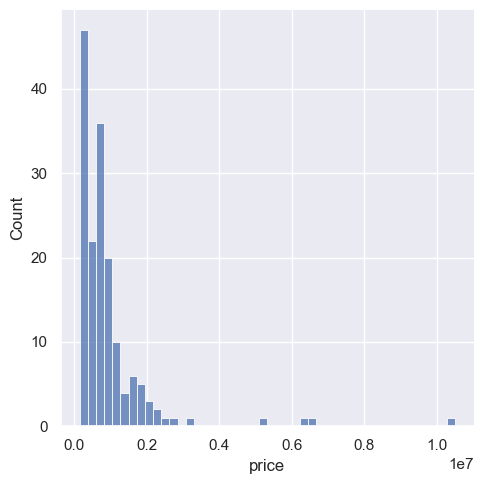

In [7]:
ax=sns.displot(df['price'])

In [8]:
q = df['price'].quantile(0.95)
df = df[df['price']<q]

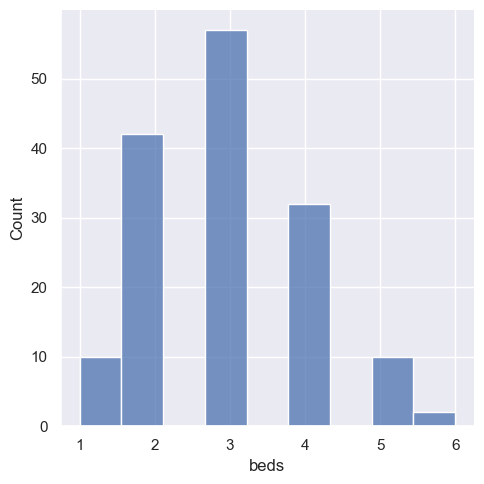

In [9]:
ax=sns.displot(df['beds'])

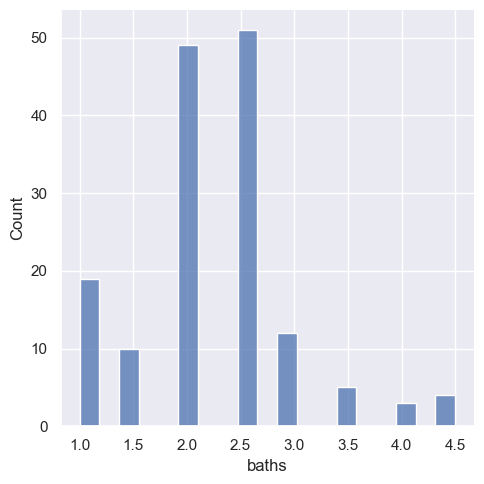

In [10]:
ax=sns.displot(df['baths'])

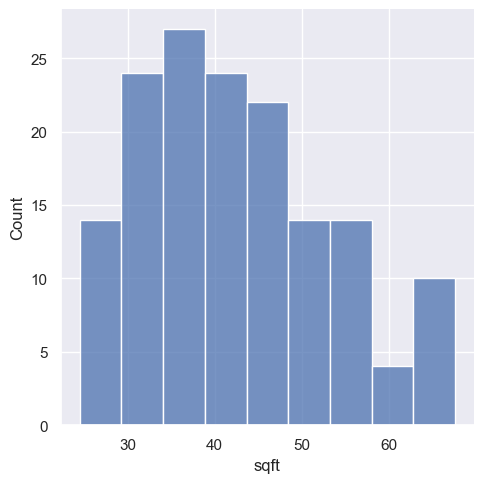

In [11]:
ax=sns.displot(np.sqrt(df['sqft']))

In [12]:
df['sqft'] = np.sqrt(df['sqft'])

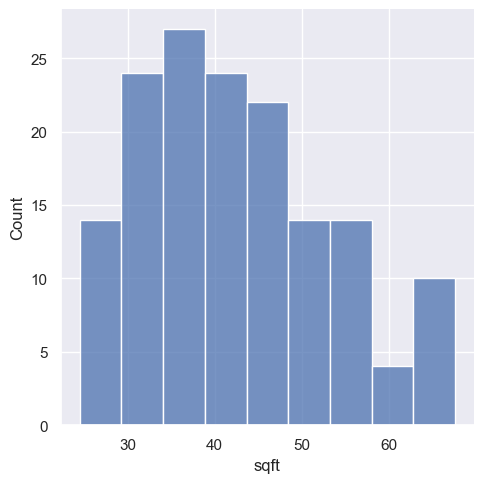

In [13]:
ax=sns.displot(df['sqft'])

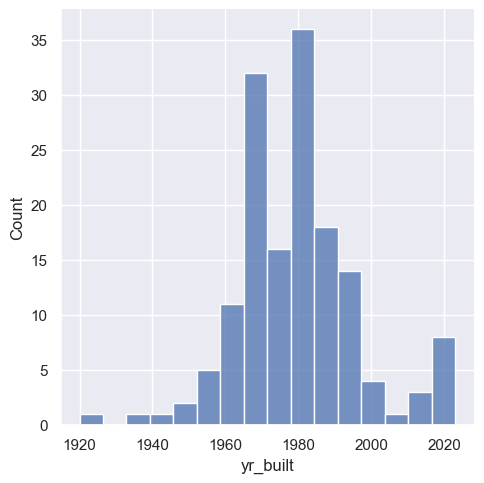

In [14]:
ax=sns.displot(df['yr_built'])

In [15]:
q = df['yr_built'].quantile(0.01)
df = df[df['yr_built']>q]

In [16]:
df = df.reset_index(drop=True)
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,has_hoa,senior_community_yn,style,county,new_construction_yn,log_price
count,151,151,1.510000e+02,151.000000,151.000000,151.000000,151,151.000000,151,151,151,151,151,151,151.000000
unique,151,151,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2,NaN
top,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,No,Single Family Residential,Clackamas County,No,NaN
freq,1,1,NaN,NaN,NaN,NaN,83,NaN,94,89,149,95,112,149,NaN
mean,NaN,NaN,7.049048e+05,2.973510,2.238411,42.315296,NaN,1979.894040,NaN,NaN,NaN,NaN,NaN,NaN,13.274740
std,NaN,NaN,4.444198e+05,1.070495,0.754618,10.781706,NaN,15.440705,NaN,NaN,NaN,NaN,NaN,NaN,0.629456
min,NaN,NaN,1.500000e+05,1.000000,1.000000,24.494897,NaN,1941.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.918391
25%,NaN,NaN,3.240000e+05,2.000000,2.000000,33.984574,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN,12.688456
50%,NaN,NaN,6.120940e+05,3.000000,2.000000,40.236799,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.324641
75%,NaN,NaN,8.925000e+05,4.000000,2.500000,49.295021,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.701746


## Checking OLS Assumptions

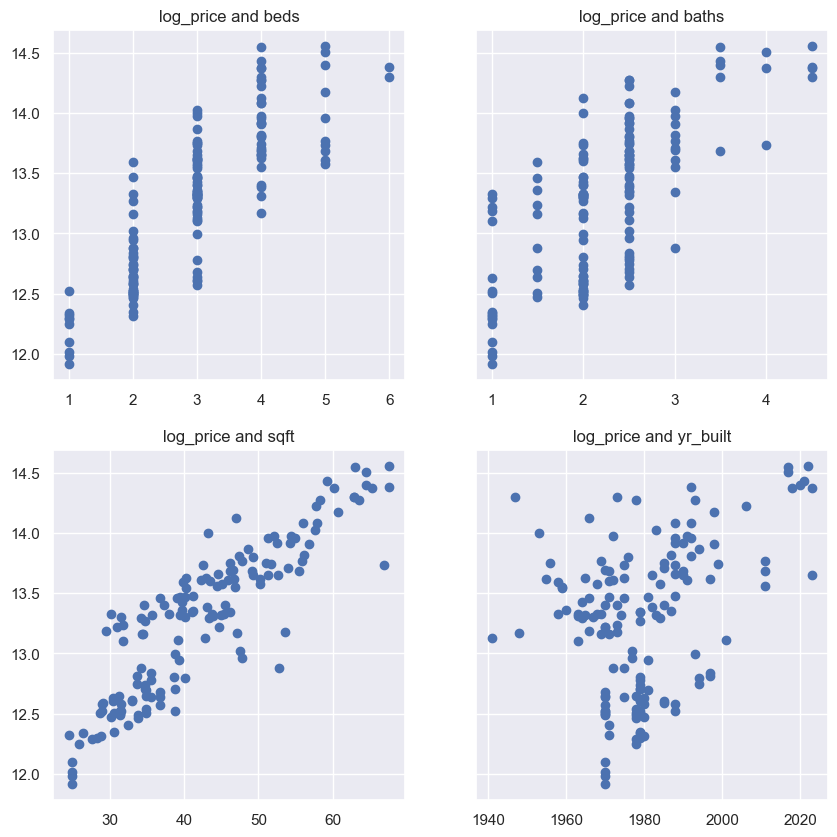

In [17]:
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, sharey=True, figsize=(10, 10))
ax1.scatter(df['beds'], df['log_price'])
ax1.set_title('log_price and beds')
ax2.scatter(df['baths'], df['log_price'])
ax2.set_title('log_price and baths')
ax3.scatter(df['sqft'], df['log_price'])
ax3.set_title('log_price and sqft')
ax4.scatter(df['yr_built'], df['log_price'])
ax4.set_title('log_price and yr_built')

plt.show()

## Create Dummy variables

In [18]:
# Reorder columns
columns = ['Address', 'link', 'price', 'log_price', 'beds', 'baths', 'sqft', 'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style', 'county', 'new_construction_yn', 'has_hoa']
df = df[columns]
cleaned_df = df[columns]

In [19]:
df = pd.get_dummies(df, columns=df.columns[8:], drop_first=True)

In [20]:
df.head()

,Address,link,price,log_price,beds,baths,sqft,yr_built,view_yn_Yes,cooling_yn_Yes,senior_community_yn_Yes,style_Single Family Residential,county_Multnomah County,new_construction_yn_Yes,has_hoa_Yes
0,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,2099000,14.556972,5,4.5,67.586981,2022,1,1,0,1,0,1,1
1,3569 Sunwood Ct,https://www.redfin.com/OR/Lake-Oswego/3569-Sun...,700000,13.458836,3,1.5,36.742346,1966,0,0,0,1,0,0,0
2,6338 Washington Ct,https://www.redfin.com/OR/Lake-Oswego/6338-Was...,800000,13.592367,2,1.5,39.849718,1958,1,1,0,1,0,0,0
3,4672 Winthrop Ct,https://www.redfin.com/OR/Lake-Oswego/4672-Win...,1790000,14.397726,5,3.5,64.505814,2020,0,1,0,1,0,0,1
4,16900 Gassner Ln,https://www.redfin.com/OR/Lake-Oswego/16900-Ga...,1622500,14.299479,4,3.5,62.872888,1973,0,1,0,1,0,0,0


## Checking for multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[[ 'sqft', 'beds', 'yr_built', 'cooling_yn_Yes', 'style_Single Family Residential', 'county_Multnomah County', 'has_hoa_Yes']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [22]:
vif

,VIF,features
0,54.771701,sqft
1,34.704255,beds
2,21.516566,yr_built
3,3.535037,cooling_yn_Yes
4,7.070522,style_Single Family Residential
5,1.695224,county_Multnomah County
6,3.376587,has_hoa_Yes


## Linear Regression Model

In [23]:
targets = df['price']
inputs = df.drop(['Address', 'link', 'price', 'baths', 'log_price', 'senior_community_yn_Yes', 'new_construction_yn_Yes', 'view_yn_Yes'], axis=1)

### Scale the data

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [25]:
inputs_scaled = scaler.transform(inputs)

In [26]:
inputs_scaled

array([[ 1.89933925,  2.3517414 ,  2.73602021, ...,  0.7677719 ,
        -0.59009684,  0.83464317],
       [ 0.02482796, -0.51860951, -0.90282642, ...,  0.7677719 ,
        -0.59009684, -1.1981168 ],
       [-0.91242768, -0.22944263, -1.42266166, ...,  0.7677719 ,
        -0.59009684, -1.1981168 ],
       ...,
       [-0.91242768, -0.70075187, -0.05809417, ...,  0.7677719 ,
        -0.59009684,  0.83464317],
       [ 0.02482796,  1.04582844, -0.44797059, ...,  0.7677719 ,
        -0.59009684,  0.83464317],
       [ 0.02482796,  0.08530072, -1.74755868, ...,  0.7677719 ,
        -0.59009684,  0.83464317]])

### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=0)

### Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5.0)
ridge.fit(x_train, y_train)

Ridge(alpha=5.0)

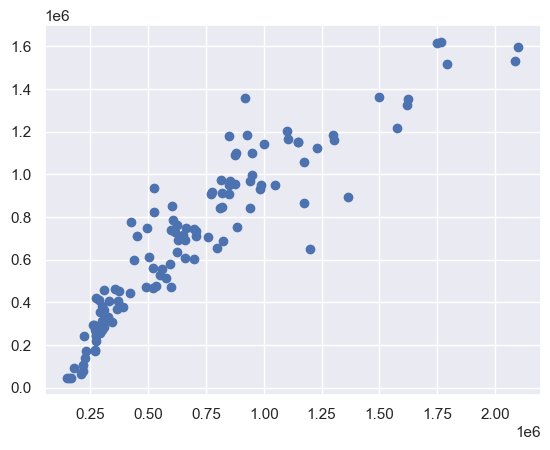

In [29]:
y_hat = ridge.predict(x_train)
plt.scatter(y_train, y_hat)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

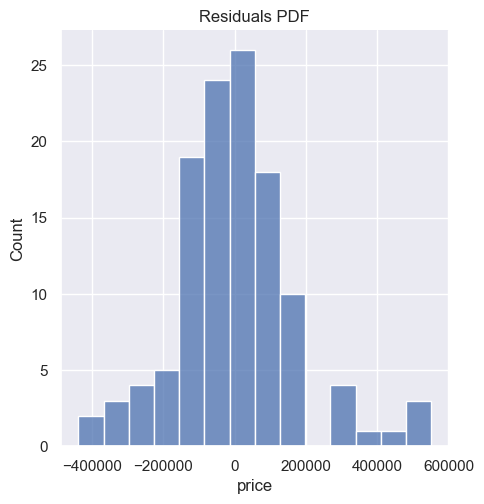

In [30]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF")

In [31]:
ridge.score(x_train, y_train)

0.8483630829823748

In [32]:
ridge.score(x_test, y_test)

0.8865521776358535

In [33]:
def adj_r2(x,y):
    r2 = ridge.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [34]:
adj_r2(x_train, y_train)

0.8388857756687733

In [35]:
adj_r2(x_test, y_test)

0.8520245795250263

In [36]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = (np.exp(ridge.coef_ / scaler.scale_) - 1) * 100

/var/folders/74/tv0bg0gs343683qx5gss88h00000gn/T/ipykernel_43241/4212541744.py:2: RuntimeWarning: overflow encountered in exp
  reg_summary['Weights'] = (np.exp(ridge.coef_ / scaler.scale_) - 1) * 100


In [37]:
from sklearn.feature_selection import f_regression
f_stat, p_values = f_regression(x_train, y_train)

In [38]:
reg_summary['f_stat'] = f_stat.round(3)
reg_summary['p_value'] = p_values.round(3)
reg_summary

,Features,Weights,f_stat,p_value
0,beds,inf,188.964,0.000
1,sqft,inf,448.573,0.000
2,yr_built,inf,21.222,0.000
3,cooling_yn_Yes,inf,20.049,0.000
4,style_Single Family Residential,inf,103.347,0.000
5,county_Multnomah County,-100.0,12.383,0.001
6,has_hoa_Yes,-100.0,7.826,0.006


In [39]:
y_hat_test = ridge.predict(x_test)

## Test Dataset Error Plot

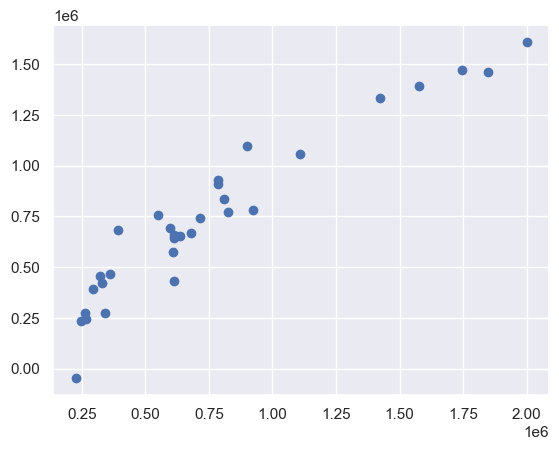

In [40]:
plt.scatter(y_test, y_hat_test)
plt.show()

In [86]:
df_pf = pd.DataFrame(y_hat_test, columns=['predictions'])

In [87]:
y_test = y_test.reset_index(drop=True)
df_pf['target'] = y_test
df_pf

,predictions,target
0,940850.81,900000
1,1688115.77,1745000
2,242581.47,244900
3,348486.51,330000
4,1098403.03,1109000
5,814650.90,785000
6,815005.34,810000
7,894986.71,924229
8,618233.32,612000
9,349153.13,321000


In [88]:
df_pf['residual'] = df_pf['target'] - df_pf['predictions']
df_pf['Difference%'] = (df_pf['residual']/df_pf['target']*100).round(2)
df_pf

,predictions,target,residual,Difference%
0,940850.81,900000,-40850.81,-4.54
1,1688115.77,1745000,56884.23,3.26
2,242581.47,244900,2318.53,0.95
3,348486.51,330000,-18486.51,-5.60
4,1098403.03,1109000,10596.97,0.96
5,814650.90,785000,-29650.90,-3.78
6,815005.34,810000,-5005.34,-0.62
7,894986.71,924229,29242.29,3.16
8,618233.32,612000,-6233.32,-1.02
9,349153.13,321000,-28153.13,-8.77


In [89]:
import scipy.stats as stats
SE_residual = np.sqrt(np.sum(df_pf['residual']**2) / (len(y_test) - x_test.shape[1]))
margin_error = SE_residual*stats.t.ppf(.9, len(x_test) - 1)
df_pf['lower_bound'] = df_pf['predictions'] - margin_error
df_pf['upper_bound'] = df_pf['predictions'] + margin_error
df_pf

,predictions,target,residual,Difference%,lower_bound,upper_bound
0,940850.81,900000,-40850.81,-4.54,889711.33,991990.28
1,1688115.77,1745000,56884.23,3.26,1636976.30,1739255.25
2,242581.47,244900,2318.53,0.95,191441.99,293720.94
3,348486.51,330000,-18486.51,-5.60,297347.03,399625.99
4,1098403.03,1109000,10596.97,0.96,1047263.55,1149542.51
5,814650.90,785000,-29650.90,-3.78,763511.42,865790.38
6,815005.34,810000,-5005.34,-0.62,763865.86,866144.81
7,894986.71,924229,29242.29,3.16,843847.23,946126.19
8,618233.32,612000,-6233.32,-1.02,567093.84,669372.80
9,349153.13,321000,-28153.13,-8.77,298013.66,400292.61


# Writing predictions to csv

In [92]:
predicted_price = ridge.predict(inputs_scaled)
cleaned_df['predicted_price'] = predicted_price
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cleaned_df['difference'] = cleaned_df['predicted_price'] - cleaned_df['price']
cleaned_df['difference%'] = 100*cleaned_df['difference']/cleaned_df['price']
column_order = ['Address', 'link', 'price', 'predicted_price', 'difference', 'difference%', 'beds', 'baths', 'sqft',
       'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style',
       'county', 'new_construction_yn', 'has_hoa']
cleaned_df = cleaned_df[column_order]
cleaned_df

,Address,link,price,predicted_price,difference,difference%,beds,baths,sqft,yr_built,view_yn,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa
0,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,2099000,1996007.96,-102992.04,-4.91,5,4.50,67.59,2022,Yes,Yes,No,Single Family Residential,Clackamas County,Yes,Yes
1,3569 Sunwood Ct,https://www.redfin.com/OR/Lake-Oswego/3569-Sun...,700000,680456.78,-19543.22,-2.79,3,1.50,36.74,1966,No,No,No,Single Family Residential,Clackamas County,No,No
2,6338 Washington Ct,https://www.redfin.com/OR/Lake-Oswego/6338-Was...,800000,770527.53,-29472.47,-3.68,2,1.50,39.85,1958,Yes,Yes,No,Single Family Residential,Clackamas County,No,No
3,4672 Winthrop Ct,https://www.redfin.com/OR/Lake-Oswego/4672-Win...,1790000,1733537.17,-56462.83,-3.15,5,3.50,64.51,2020,No,Yes,No,Single Family Residential,Clackamas County,No,Yes
4,16900 Gassner Ln,https://www.redfin.com/OR/Lake-Oswego/16900-Ga...,1622500,1567126.07,-55373.93,-3.41,4,3.50,62.87,1973,No,Yes,No,Single Family Residential,Clackamas County,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,5254 Westfield Ct,https://www.redfin.com/OR/Lake-Oswego/5254-Wes...,1300000,1276651.07,-23348.93,-1.80,4,2.50,57.84,1988,Yes,Yes,No,Single Family Residential,Clackamas County,No,Yes
147,4638 Lower Dr,https://www.redfin.com/OR/Lake-Oswego/4638-Low...,307500,319034.21,11534.21,3.75,2,1.50,35.50,1975,No,No,No,Condo/Co-op,Clackamas County,No,Yes
148,4324 Woodside Cir,https://www.redfin.com/OR/Lake-Oswego/4324-Woo...,579000,565456.19,-13543.81,-2.34,2,2.00,34.79,1979,Yes,Yes,No,Single Family Residential,Clackamas County,No,Yes
149,110 Greenridge Ct,https://www.redfin.com/OR/Lake-Oswego/110-Gree...,527000,611630.26,84630.26,16.06,3,2.50,53.55,1973,No,No,No,Single Family Residential,Clackamas County,No,Yes


In [93]:
cleaned_df.to_csv('predictions/nonlog_ridge_predictions.csv')